In [1]:
from sklearn import tree
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
digits = load_digits()

In [3]:
clf_dtc = tree.DecisionTreeClassifier(max_depth=128)

In [4]:
x_train_dtc, x_test_dtc, y_train_dtc, y_test_dtc = train_test_split(digits.data, digits.target)

In [5]:
clf_dtc.fit(x_train_dtc, y_train_dtc)

DecisionTreeClassifier(max_depth=128)

In [6]:
predicted_dtc = clf_dtc.predict(x_test_dtc)
expected_dtc = y_test_dtc

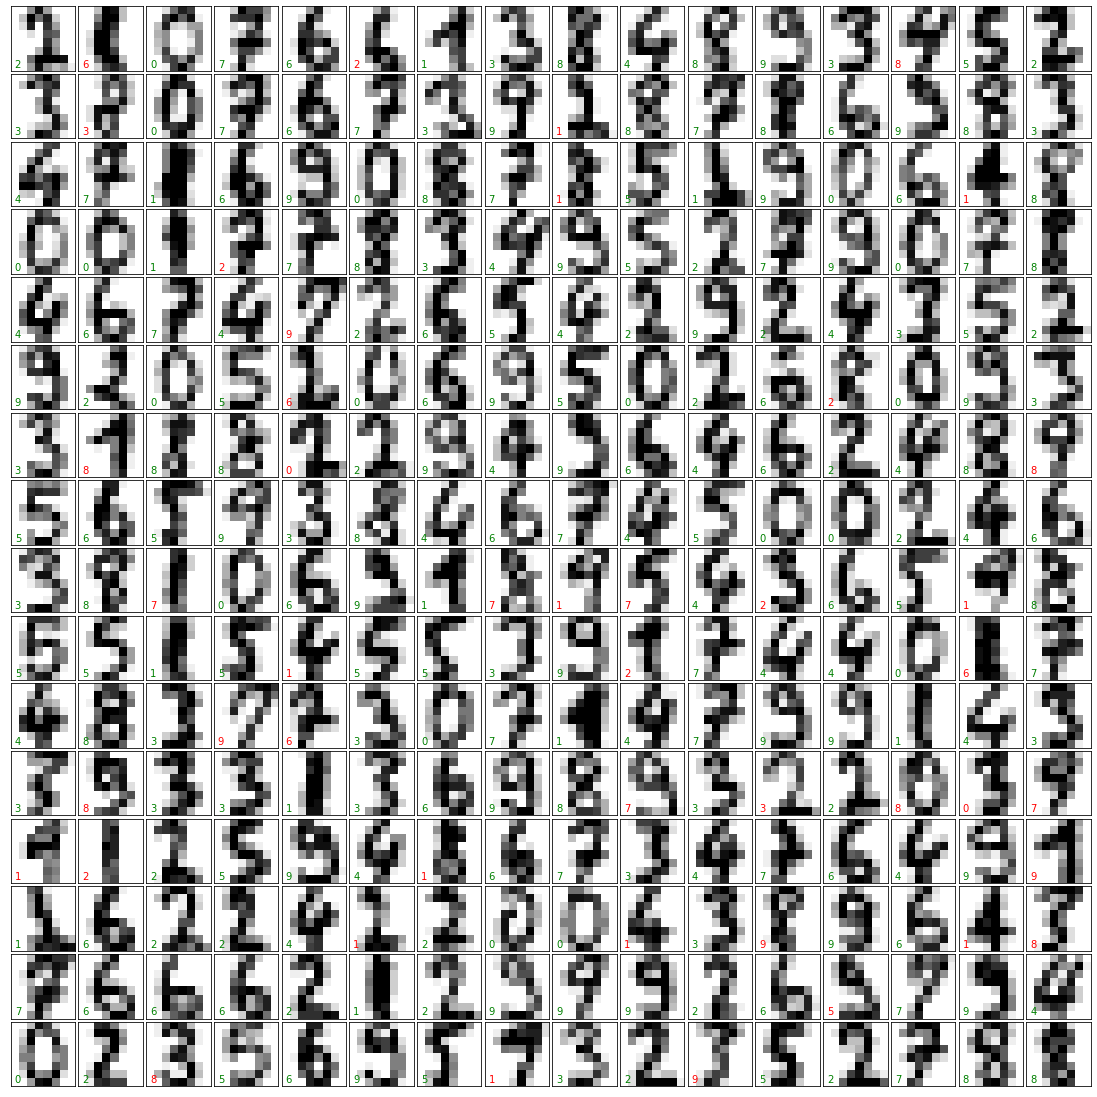

In [7]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(256):
    ax = fig.add_subplot(16, 16, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test_dtc.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    if predicted_dtc[i] == expected_dtc[i]:
        ax.text(0, 7, str(predicted_dtc[i]), color='green')
    else:
        ax.text(0, 7, str(predicted_dtc[i]), color='red')

In [8]:
print(metrics.classification_report(expected_dtc, predicted_dtc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.70      0.76      0.73        42
           2       0.83      0.82      0.82        49
           3       0.89      0.83      0.86        48
           4       0.94      0.87      0.90        54
           5       0.98      0.95      0.96        42
           6       0.84      0.95      0.89        39
           7       0.86      0.88      0.87        48
           8       0.70      0.78      0.74        36
           9       0.84      0.74      0.79        50

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



In [9]:
d_dtc = [array for array in metrics.confusion_matrix(expected_dtc, predicted_dtc)]
data_matrix_dtc = {"0": d_dtc[0], "1": d_dtc[1], "2": d_dtc[2], "3": d_dtc[3], "4": d_dtc[4], \
                   "5": d_dtc[5], "6": d_dtc[6], "7": d_dtc[7], "8": d_dtc[8], "9": d_dtc[9]}
df_matrix_dtc = pd.DataFrame(data=data_matrix_dtc)
df_matrix_dtc

,0,1,2,3,4,5,6,7,8,9
0,40,0,2,1,0,0,0,0,0,0
1,0,32,2,0,5,0,0,0,3,4
2,0,2,40,1,0,0,1,1,2,1
3,0,0,2,40,0,0,0,1,1,1
4,0,1,0,0,47,0,1,1,0,0
5,0,0,0,0,0,40,0,0,0,1
6,1,3,1,0,0,1,37,1,0,0
7,0,1,0,0,1,1,0,42,1,3
8,1,1,2,4,1,0,0,0,28,3
9,0,2,0,2,0,0,0,2,1,37
